In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# entropy vs p plots

In [20]:
table=pd.read_csv('table_entropy.csv')
table

,Rule,Class,"p=0, c=1 no translation","p=1, c=1 no translation","p=2, c=1 no translation","p=3, c=1 no translation","p=4, c=1 no translation","p=5, c=1 no translation","p=6, c=1 no translation","p=7, c=1 no translation",...,"p=2, c=3, right-2 translation","p=3, c=3, right-2 translation","p=4, c=3, right-2 translation","p=0, c=4, right-2 translation","p=1, c=4, right-2 translation","p=2, c=4, right-2 translation","p=3, c=4, right-2 translation","p=0, c=5, right-2 translation","p=1, c=5, right-2 translation","p=2, c=5, right-2 translation"
0,0,1,2.220446e-16,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,6.931472e-01,6.931472e-01,6.931472e-01,-8.881784e-16,6.931472e-01,6.931472e-01,6.931472e-01,5.995204e-15,6.931472e-01,6.931472e-01
1,1,2,-1.322436e+01,-14.048539,-1.412084e+01,-1.287871e+01,-1.224844e+01,-1.300055e+01,-1.171553e+01,-1.226735e+01,...,-9.505530e+00,-1.554312e-15,-9.073461e+00,3.552714e-15,6.093779e-01,6.093779e-01,6.093779e-01,2.664535e-15,2.220446e-15,-1.110223e-15
2,2,2,0.000000e+00,0.481212,4.812118e-01,4.812118e-01,4.812118e-01,4.812118e-01,4.812118e-01,4.812118e-01,...,4.812118e-01,4.812118e-01,4.812118e-01,6.661338e-16,4.812118e-01,4.812118e-01,4.812118e-01,1.110223e-15,4.812118e-01,4.812118e-01
3,3,2,-inf,-39.592842,-2.290786e+01,-1.915030e+01,-2.187116e+01,-1.897310e+01,-2.051386e+01,-2.184961e+01,...,-1.233707e+01,-1.309559e+01,-1.222935e+01,5.623991e-01,6.931472e-01,6.931472e-01,6.931472e-01,-1.210557e+01,-1.336369e+01,-1.619634e+01
4,4,2,4.812118e-01,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,5.623991e-01,5.623991e-01,5.623991e-01,2.220446e-16,5.623991e-01,5.623991e-01,5.623991e-01,2.220446e-16,5.623991e-01,5.623991e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,178,2,0.000000e+00,0.000000,1.110223e-15,2.220446e-16,6.661338e-16,-1.110223e-16,2.220446e-16,0.000000e+00,...,4.511694e-01,-4.440892e-16,4.774325e-01,8.881784e-16,3.822451e-01,4.511694e-01,4.708454e-01,1.332268e-15,3.822451e-01,8.881784e-16
84,184,2,6.971369e-09,0.000000,9.560761e-09,0.000000e+00,1.268336e-08,-2.664535e-15,2.220446e-16,2.421365e-08,...,3.465736e-01,1.386294e-01,4.496806e-01,2.094439e-08,2.406059e-01,3.465736e-01,4.084360e-01,2.920712e-08,2.406059e-01,2.299197e-01
85,200,1,5.623991e-01,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,4.812118e-01,4.812118e-01,4.812118e-01,1.110223e-15,4.812118e-01,4.812118e-01,4.812118e-01,-4.440892e-16,4.812118e-01,4.812118e-01
86,204,2,6.931472e-01,0.693147,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,...,-1.110223e-16,6.661338e-16,4.440892e-16,0.000000e+00,6.661338e-16,6.661338e-16,-4.440892e-16,6.661338e-16,8.881784e-16,-4.440892e-16


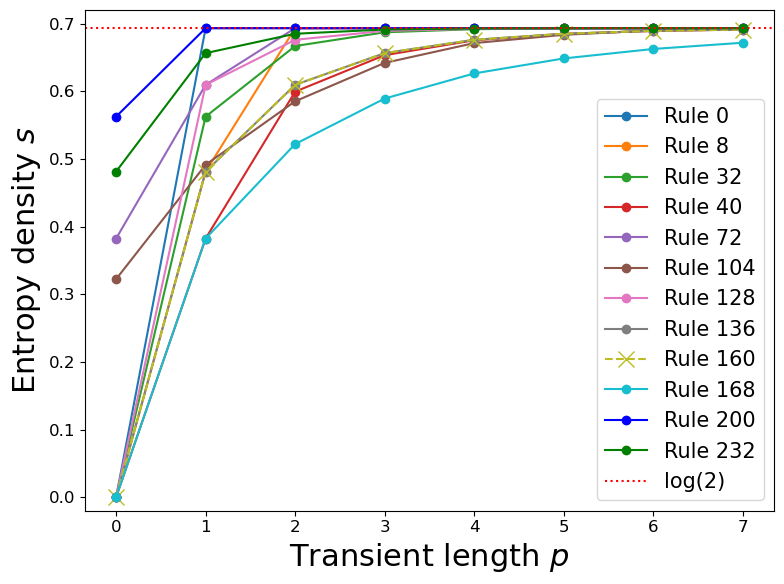

In [21]:
# Class 1 all rules vs p
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
max_p = 8
c=1

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 12})  # Increase font size
colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

for idx, rule in enumerate(class_1):
    rule_df = table[table['Rule'] == rule]
    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
        entropy.append(value)
    if rule==160:
        plt.plot(np.arange(max_p), entropy, marker='x', linestyle='--', label=f'Rule {rule}', color=colors[idx], markersize=12)
    else:
        plt.plot(np.arange(max_p), entropy, marker='.', label=f'Rule {rule}', color=colors[idx], markersize=12)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

plt.xlabel(r'Transient length $p$', fontsize=22)
plt.ylabel(r'Entropy density $s$', fontsize=22)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.ylim(-0.02, 0.72) 

plt.legend(fontsize=15)      
plt.tight_layout()
plt.savefig('figures/class_1_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


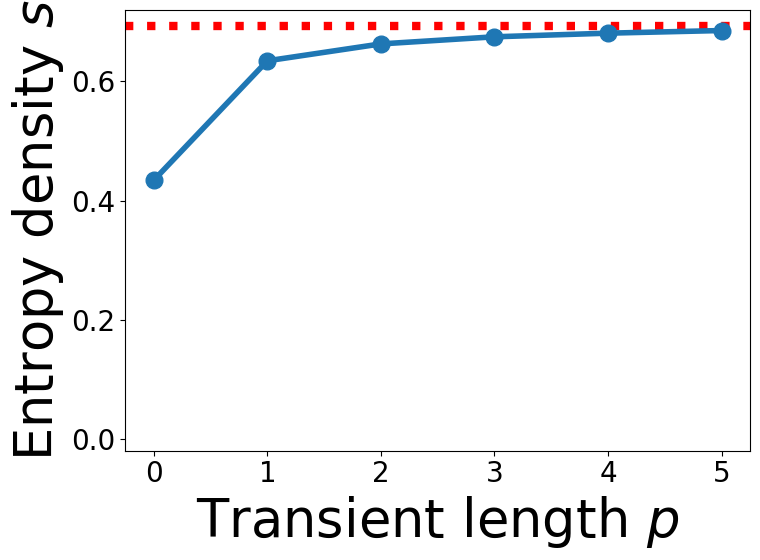

In [22]:
# Class 2 rule 6
rule=6
max_p = 6
c=2

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 20})  # Increase font size

rule_df = table[table['Rule'] == rule]
entropy = []
plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)', linewidth=6)
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', markersize=24, linewidth=4)


plt.xlabel(r'Transient length $p$', fontsize=38)
plt.ylabel(r'Entropy density $s$', fontsize=38)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p

plt.ylim(-0.02, 0.72) 
#plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.tight_layout()
plt.savefig('figures/rule_6_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


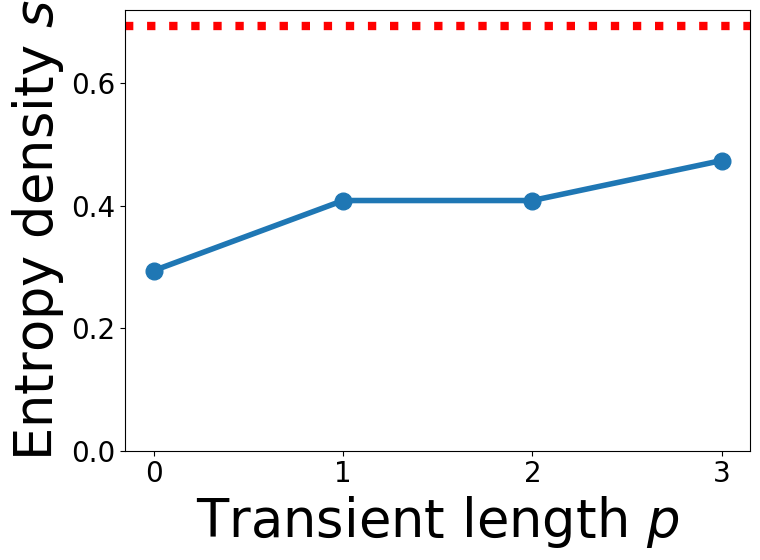

In [23]:
# Class 2 rule 41
rule=41
max_p = 4
c=4

plt.figure(figsize=(8, 6))  # Make the figure a bit larger
plt.rcParams.update({'font.size': 20})  # Increase font size

rule_df = table[table['Rule'] == rule]
entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', markersize=24, linewidth=4)

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)', linewidth=6)

plt.xlabel(r'Transient length $p$', fontsize=38)
plt.ylabel(r'Entropy density $s$', fontsize=38)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p

plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1
plt.ylim(0, 0.72)  # Set y-axis limits to 0 and 1.1
plt.tight_layout()
plt.savefig('figures/rule_41_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


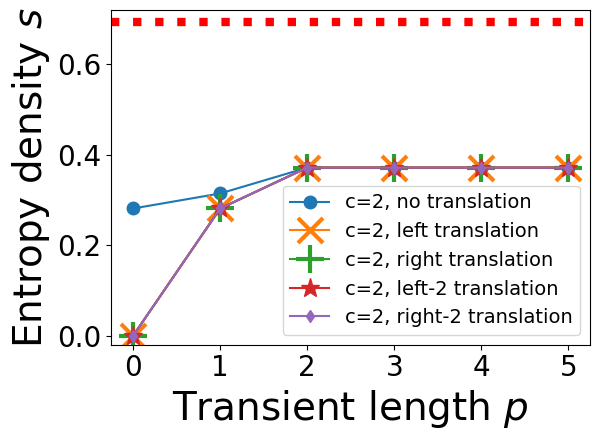

In [24]:
# Entropy as function of  for different neighborhoods, rule 146
rule=146
max_p = 6
c=2 

rule_df = table[table['Rule'] == rule]
entropies=rule_df.to_numpy()[0]
entropy = []

plt.rcParams.update({'font.size': 20})  # Increase font size
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=18)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=18, markeredgewidth=3)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=20, markeredgewidth=3)


entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='*', label=f'c={c}, left-2 translation',markersize=14)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='d', label=f'c={c}, right-2 translation',markersize=6)



plt.axhline(np.log(2), color='red', linestyle=':', linewidth=6)

plt.xlabel(r'Transient length $p$', fontsize=28)
plt.ylabel(r'Entropy density $s$', fontsize=28)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
plt.legend(fontsize=14)      
plt.tight_layout()
plt.savefig('figures/rule_146_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();

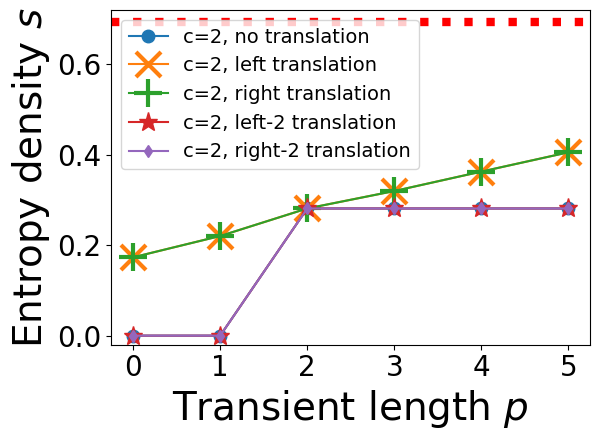

In [25]:
# Entropy as function of  for different neighborhoods, rule 54
rule=54
max_p = 6
c=2

rule_df = table[table['Rule'] == rule]
entropy = []

plt.rcParams.update({'font.size': 20})  # Increase font size
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=18)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=18, markeredgewidth=3)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=20, markeredgewidth=3)


entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, left-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='*', label=f'c={c}, left-2 translation',markersize=14)

entropy = []
for p in range(max_p):
    value = float(rule_df[f'p={p}, c={c}, right-2 translation'].iloc[0])
    entropy.append(value)
plt.plot(np.arange(max_p), entropy, marker='d', label=f'c={c}, right-2 translation',markersize=6)


plt.axhline(np.log(2), color='red', linestyle=':', linewidth=6)

plt.xlabel(r'Transient length $p$', fontsize=28)
plt.ylabel(r'Entropy density $s$', fontsize=28)
plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
plt.legend(fontsize=14)      
plt.tight_layout()
plt.savefig('figures/rule_54_entropy_vs_p.pdf', dpi=300, bbox_inches='tight')
plt.show();


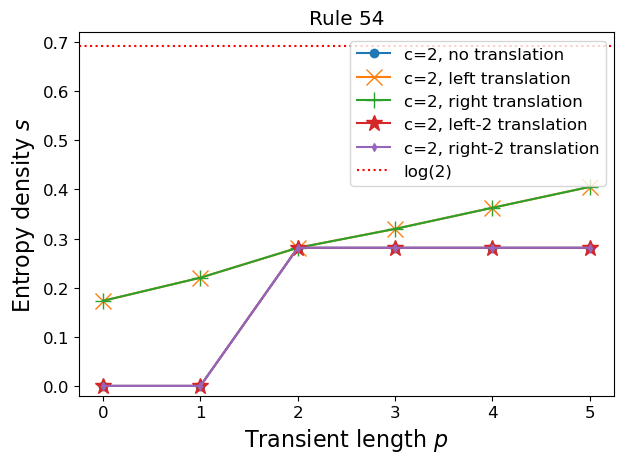

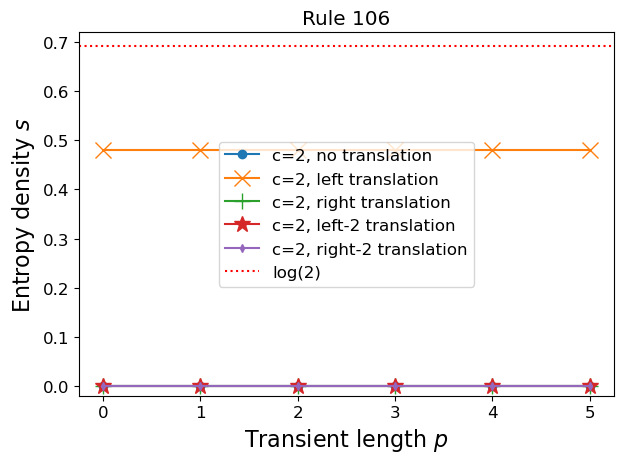

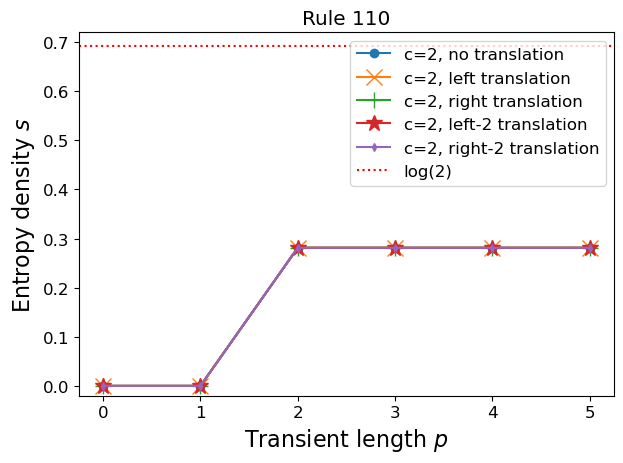

In [42]:
# Entropy as function of  for different neighborhoods for all rules in class 3 and 4
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]

max_p = 6
c=2

for rule in class_4:
    rule_df = table[table['Rule'] == rule]
    try:
        entropies=rule_df.to_numpy()[0]
    except:
        continue
    entropy = []

    plt.rcParams.update({'font.size': 12})  # Increase font size
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c} no translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='.', label=f'c={c}, no translation', markersize=12)

    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, left translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='x', label=f'c={c}, left translation', markersize=12)

    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, right translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='+', label=f'c={c}, right translation',markersize=12)

    
    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, left-2 translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='*', label=f'c={c}, left-2 translation',markersize=12)

    entropy = []
    for p in range(max_p):
        value = float(rule_df[f'p={p}, c={c}, right-2 translation'].iloc[0])
        entropy.append(value)
    plt.plot(np.arange(max_p), entropy, marker='d', label=f'c={c}, right-2 translation',markersize=4)
    


    plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')

    plt.xlabel(r'Transient length $p$', fontsize=16)
    plt.ylabel(r'Entropy density $s$', fontsize=16)
    plt.title(f'Rule {rule}')
    plt.xticks(np.arange(0, max_p, 1))  # ticks at 0,1,2,...max_p
    #plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylim(-0.02, 0.72)  # Set y-axis limits to 0 and 1.1 
    plt.legend(fontsize=12)      
    plt.tight_layout()
    plt.show();


# Maximal entropy plot

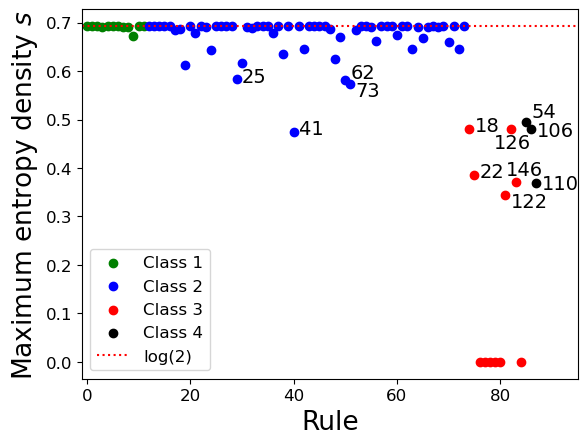

In [27]:
# max entropy all rules
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules = class_1 + class_2 + class_3 + class_4
fig, ax=plt.subplots()
first_class1=True
first_class2=True
first_class3=True
first_class4=True


plt.rcParams.update({'font.size': 12})  # Increase font size

for idx, rule in enumerate(all_rules):
    rule_df = table[table['Rule'] == rule]
    try:
        entropies=rule_df.to_numpy()[0]
    except:
        print(f"Rule {rule} not found in the table.")
        continue
    # replace NaN by - infinity
    entropies = np.nan_to_num(entropies, nan=-np.inf)
    if entropies[1] == 1:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='green', label='Class 1' if first_class1 else "")
        first_class1=False
    elif entropies[1] == 2:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='blue', label='Class 2' if first_class2 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)<0.6:
            ax.text(x=idx+1, y=np.maximum(np.max(entropies[2:]), -0.1)-0.005+0.01*(rule==62)-0.02*(rule==73), s=f'{rule}', fontsize=14)
        first_class2=False
    elif entropies[1] == 3:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]), -0.1), color='red', label='Class 3' if first_class3 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)>0.3:
            ax.text(x=idx+1-4.2*(rule==126)-3*(rule==146), y=np.maximum(np.max(entropies[2:]), -0.1)-0.005-0.02*(rule==122)-0.025*(rule==126)+0.015*(rule==146)-0.01*(rule==126)+0.003*(rule==146), s=f'{rule}', fontsize=14)
        first_class3=False
    elif entropies[1] == 4:
        ax.scatter(idx, np.maximum(np.max(entropies[2:]),-0.1), color='black', label='Class 4' if first_class4 else "")
        if np.maximum(np.max(entropies[2:]), -0.1)>0.2:
            ax.text(x=idx+1, y=np.maximum(np.max(entropies[2:]), -0.1)-0.005-0.008*(rule==110)+0.015*(rule==54)-0.01*(rule==106), s=f'{rule}', fontsize=14)
        first_class4=False

plt.axhline(np.log(2), color='red', linestyle=':', label='log(2)')
plt.xlim(-1, len(all_rules)+7)  # Set x-axis limits to 0 and 1.1

ax.legend(fontsize=12)
ax.set_xlabel('Rule', fontsize=19)
ax.set_ylabel(r'Maximum entropy density $s$', fontsize=19)
plt.savefig('figures/max_entropy_results_with_rule_code.pdf', dpi=300, bbox_inches='tight');




# Maximal entropy table

In [28]:
# TODO: create latex table
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules = class_1 + class_2 + class_3 + class_4
all_rules.sort()

table_list=[]

for idx, rule in enumerate(all_rules):
    try:
        rule_df = table[table['Rule'] == rule]
        entropies=rule_df.to_numpy()[0]
        # replace NaN by - infinity
        entropies = np.nan_to_num(entropies, nan=-np.inf)
        max_entropy=np.max(entropies[2:])
        idx_max_entropy=np.argmax(entropies[2:])
        table_list.append([rule, int(entropies[1]), np.round(entropies[2],3), np.round(max_entropy,3), table.columns[2+idx_max_entropy]])
    except:
        print(f"Rule {rule} not found in the table.")
        continue

for row in table_list:
    row[4] = row[4].replace("translation", "tr.")
for row in table_list:
    row[4] = row[4].replace("left tr.", "left-tr.")
for row in table_list:
    row[4] = row[4].replace("right tr.", "right-tr.")

# Create DataFrame
df = pd.DataFrame(table_list, columns=[
    'Rule', 'Class', 'p=0, c=1', 'max $s$', 'p,c, neighborhood'
])

# Replace -inf with LaTeX string before rounding
df['p=0, c=1'] = df['p=0, c=1'].replace(-np.inf, r'$-\infty$')

# Round numeric columns (except where we already replaced with LaTeX)
numeric_cols = ['p=0, c=1', 'max $s$']
df[numeric_cols[1]] = df[numeric_cols[1]].astype(float).round(3)

roman_map = {1: 'I', 2: 'II', 3: 'III', 4: 'IV'} 
df['Class'] = df['Class'].replace(roman_map)

# Convert to LaTeX
latex_code = df.to_latex(index=False, escape=False, float_format="%.3f")

# Print LaTeX code
print(latex_code)


\begin{tabular}{rllrl}
\toprule
Rule & Class & p=0, c=1 & max $s$ & p,c, neighborhood \\
\midrule
0 & I & 0.000 & 0.693 & p=2, c=5, right-tr. \\
1 & II & -13.224 & 0.693 & p=5, c=2 no tr. \\
2 & II & 0.000 & 0.693 & p=1, c=1, left-tr. \\
3 & II & $-\infty$ & 0.693 & p=3, c=4, right-2 tr. \\
4 & II & 0.481 & 0.693 & p=2, c=5 no tr. \\
5 & II & 0.281 & 0.693 & p=1, c=2 no tr. \\
6 & II & 0.000 & 0.686 & p=5, c=2, left-tr. \\
7 & II & 0.000 & 0.687 & p=5, c=2, right-2 tr. \\
8 & I & -0.000 & 0.693 & p=6, c=1, right-2 tr. \\
9 & II & -9.241 & 0.612 & p=5, c=2, right-tr. \\
10 & II & -0.000 & 0.693 & p=1, c=1, left-2 tr. \\
11 & II & -14.338 & 0.680 & p=5, c=2, right-tr. \\
12 & II & 0.481 & 0.693 & p=6, c=2 no tr. \\
13 & II & 0.281 & 0.691 & p=7, c=1 no tr. \\
14 & II & 0.000 & 0.643 & p=6, c=1, left-tr. \\
15 & II & -0.000 & 0.693 & p=3, c=4, right-tr. \\
18 & III & 0.000 & 0.481 & p=4, c=3, right-tr. \\
19 & II & -19.247 & 0.693 & p=6, c=2 no tr. \\
22 & III & 0.000 & 0.386 & p=4, c=4 n

c:\Users\ckoller\AppData\Local\anaconda3\envs\env\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


# s vs rho plot

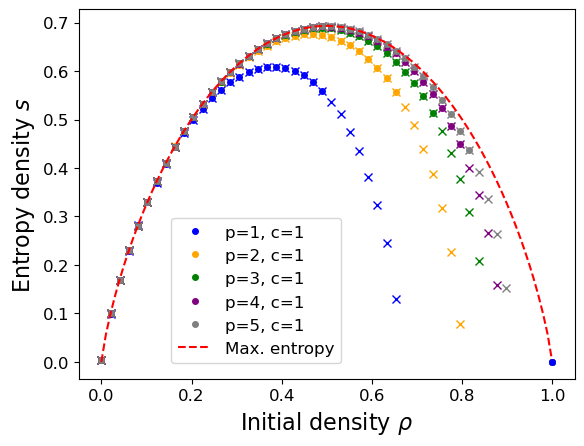

In [29]:
s_vs_rho=pd.read_csv('s_given_rho_rule_128.csv')
s_vs_rho_ending_all_0=pd.read_csv('s_given_rho_rule_128_ending_all_0.csv')
# Extract the densities (column headers)
colors = ['blue', 'orange', 'green', 'purple', 'gray']
densities = s_vs_rho.columns[1:].to_numpy().astype(float)

plt.rcParams.update({'font.size': 12})  # Increase font size

for idx, label in enumerate(s_vs_rho['Unnamed: 0'].to_list()):
    plt.plot(densities, s_vs_rho.iloc[idx, 1:], label=label+', c=1', color=colors[idx], marker='o', linestyle='', markersize=4)
    plt.plot(densities, s_vs_rho_ending_all_0.iloc[idx, 1:], color=colors[idx], marker='x', linestyle='', markersize=6)    
plt.plot(np.linspace(0,1,100), np.log(1/(np.linspace(0,1,100)**np.linspace(0,1,100)*(1-np.linspace(0,1,100))**(1-np.linspace(0,1,100)))), color='r', linestyle='--', label='Max. entropy')
plt.plot(1,0, marker='o', color=colors[0], markersize=4)
plt.xlabel(r'Initial density $\rho$', fontsize=16)
plt.ylabel(r'Entropy density $s$', fontsize=16)
plt.legend(loc='lower left', bbox_to_anchor=(0.17, 0.02))
plt.savefig('figures/entropy_vs_density_rule_128.pdf', dpi=300, bbox_inches='tight')